#  <center>                                             Employee Attrition    </center>

Employee attrition happens when an employee leaves an organization for any reason and is not replaced for a long time, or not ever. It often results in a decrease in the size of an organization’s or department’s workforce because positions aren’t refilled when employees leave.

Attrition can occur throughout an entire company or just in certain departments or divisions. This typically happens when automation or new technologies replace employees.

Employee attrition is measured by calculating the attrition rate.


**The objective of this project is to understand the factors affecting the attrition rate based on the IBM's attrition data and classify whether an employee will attrite or not.**

<img src="attrition.png" alt="Exiting Employee" style="width: 500px;"/>



In [685]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [686]:
df= pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df_new= df.copy()

In [687]:
pd.set_option('display.max_columns', None)

In [688]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [689]:
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [690]:
df["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [691]:
df["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [692]:
df["JobRole"].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [693]:

correlation = df[['JobInvolvement', 'JobSatisfaction']].corr()

print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
                 JobInvolvement  JobSatisfaction
JobInvolvement         1.000000        -0.021476
JobSatisfaction       -0.021476         1.000000


In [694]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [695]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [696]:
df= df.drop(['Over18', 'Department', 'EducationField', 'JobRole'], axis=1)

df_new= df.copy()

In [697]:
df_new

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,1,2,1,1,2,Female,94,3,2,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,8,1,1,2,3,Male,61,2,2,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,2,2,1,4,4,Male,92,2,1,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,3,4,1,5,4,Female,56,3,1,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,2,1,1,7,1,Male,40,3,1,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,23,2,1,2061,3,Male,41,4,2,4,Married,2571,12290,4,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,6,1,1,2062,4,Male,42,2,3,1,Married,9991,21457,4,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,4,3,1,2064,2,Male,87,4,2,2,Married,6142,5174,1,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,2,3,1,2065,4,Male,63,2,2,2,Married,5390,13243,2,No,14,3,4,80,0,17,3,2,9,6,0,8


In [698]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EmployeeCount             1470 non-null   int64 
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

# Creating a dummy variable for some of the categorical variables and dropping the first one.


In [699]:
# dummy1 = pd.get_dummies(df[['Attrition','BusinessTravel', 'Gender', 
#        'MaritalStatus', 'OverTime']], drop_first=True)
# dummy1.head()

# df_dummy = pd.concat([df_new, dummy1], axis=1)
# df_dummy = df_dummy.drop(['BusinessTravel', 'Gender', 
#        'MaritalStatus', 'OverTime'], axis =1)
# df_dummy.head()



# Balancing

In [700]:
# UNDERSAMPLING

# Separating the majority and minority classes
majority_class = 'No'
minority_class = 'Yes'

majority_df = df[df['Attrition'] == majority_class]
minority_df = df[df['Attrition'] == minority_class]

# Randomly sampling rows from the majority class to make it balanced
sample_size = len(minority_df)

majority_sampled = majority_df.sample(n=sample_size, random_state=42)

# Concatenating the minority class DataFrame with the sampled majority class DataFrame
df = pd.concat([majority_sampled, minority_df])

# ensuring randomness
df= df.sample(frac=1, random_state=42).reset_index(drop=True)
df.shape
df_new= df.copy()

# Model 1 

## between attrition and WorkLifeBalance

In [703]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,35,Yes,Travel_Rarely,737,10,3,1,1639,4,Male,55,2,3,1,Married,10306,21530,9,No,17,3,3,80,0,15,3,3,13,12,6,0
1,30,Yes,Travel_Frequently,600,8,3,1,1747,3,Female,66,2,1,4,Divorced,2180,9732,6,No,11,3,3,80,1,6,0,2,4,2,1,2


In [704]:
df1= df[["Attrition","BusinessTravel", "DistanceFromHome", "OverTime", "WorkLifeBalance"]]
df1

,Attrition,BusinessTravel,DistanceFromHome,OverTime,WorkLifeBalance
0,Yes,Travel_Rarely,10,No,3
1,Yes,Travel_Frequently,8,No,2
2,No,Travel_Frequently,18,No,2
3,Yes,Travel_Rarely,24,Yes,2
4,No,Travel_Rarely,2,No,3
...,...,...,...,...,...
469,No,Travel_Frequently,1,No,3
470,Yes,Travel_Rarely,3,Yes,3
471,Yes,Travel_Rarely,2,No,3
472,Yes,Travel_Rarely,7,Yes,3


In [705]:
df1["BusinessTravel"].value_counts()

Travel_Rarely        326
Travel_Frequently    109
Non-Travel            39
Name: BusinessTravel, dtype: int64

In [706]:
# Creating a mapping dictionary
mapping1 = {'Yes': 1, 'No': 0}
mapping2= {'Travel_Frequently':2, 'Travel_Rarely':1, 'Non-Travel':0 }

# Applying the mapping to the specified column
df1['OverTime'] = df1['OverTime'].map(mapping1)
df1['Attrition'] = df1['Attrition'].map(mapping1)
df1['BusinessTravel']= df1["BusinessTravel"].map(mapping2)

df1.head(5)

C:\Users\acer\AppData\Local\Temp\ipykernel_2708\3738258657.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['OverTime'] = df1['OverTime'].map(mapping1)
C:\Users\acer\AppData\Local\Temp\ipykernel_2708\3738258657.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Attrition'] = df1['Attrition'].map(mapping1)
C:\Users\acer\AppData\Local\Temp\ipykernel_2708\3738258657.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,Attrition,BusinessTravel,DistanceFromHome,OverTime,WorkLifeBalance
0,1,1,10,0,3
1,1,2,8,0,2
2,0,2,18,0,2
3,1,1,24,1,2
4,0,1,2,0,3


In [707]:
X = df1.drop(["Attrition"], axis=1)
y = df1["Attrition"]

In [708]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [709]:
X_train.columns

Index(['BusinessTravel', 'DistanceFromHome', 'OverTime', 'WorkLifeBalance'], dtype='object')

In [710]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['BusinessTravel', 'DistanceFromHome', 'OverTime', 'WorkLifeBalance']] = scaler.fit_transform(X_train[['BusinessTravel', 'DistanceFromHome', 'OverTime', 'WorkLifeBalance']])

X_train.head()



,BusinessTravel,DistanceFromHome,OverTime,WorkLifeBalance
155,-0.258384,-0.133780,1.242427,-0.926767
453,1.624836,-0.621303,1.242427,0.403705
22,-0.258384,1.206910,1.242427,-0.926767
310,1.624836,1.572553,-0.804876,-0.926767
46,1.624836,-0.986946,-0.804876,-0.926767


In [711]:
# Logistic Regression model with balanced class weights
clf = LogisticRegression(random_state=42)

# Fitting the model
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)

# Evaluating the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 2 50]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.04      0.07        52
           1       0.45      0.95      0.61        43

    accuracy                           0.45        95
   macro avg       0.48      0.50      0.34        95
weighted avg       0.48      0.45      0.32        95



In [712]:
# Logistic regression model
import statsmodels.api as sm
logm1 = sm.Logit(y_train,(sm.add_constant(X_train)))
logm1.fit().summary()


Optimization terminated successfully.
         Current function value: 0.621045
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  379
Model:                          Logit   Df Residuals:                      374
Method:                           MLE   Df Model:                            4
Date:                Fri, 16 Feb 2024   Pseudo R-squ.:                  0.1037
Time:                        03:20:13   Log-Likelihood:                -235.38
converged:                       True   LL-Null:                       -262.60
Covariance Type:            nonrobust   LLR p-value:                 4.256e-11
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0671      0.111      0.605      0.545      -0.150       0.284
BusinessTravel       0.3364      0.114      2.953      0.003       0.113       0.560
DistanceFromHome     0.1364      0.111      1.228      0.219      -0.081       0.354
OverTime             0.6743      0.113      5.983      0.000       0.453       0.895
WorkLifeBalance     -0.2094      0.111     -1.878      0.060      -0.428       0.009
====================================================================================
"""

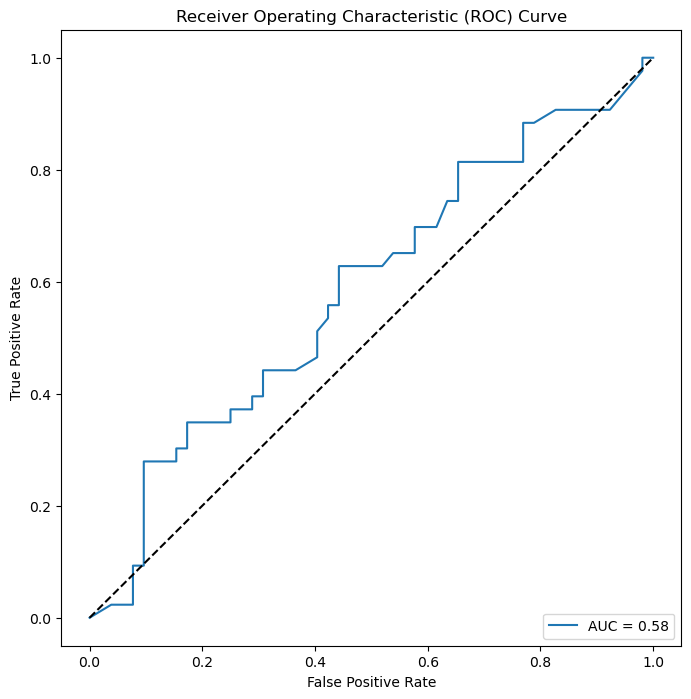

AUC: 0.5843


In [713]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, roc_auc_score




# Training LogisticRegression CV model
logm1 = LogisticRegressionCV(cv=5) 
logm1.fit(X_train, y_train)

y_probs = logm1.predict_proba(X_test)[:, 1]

# Computing ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Computing AUC
auc_value = roc_auc_score(y_test, y_probs)

# Plotting ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc_value:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


print(f'AUC: {auc_value:.4f}')



In [714]:

# Adding a constant term to the design matrix (required for statsmodels)
X = sm.add_constant(X_train)

# logistic regression model
model = sm.Probit(y_train, X).fit()

# Calculating AIC
aic_value = model.aic

print(f"AIC: {aic_value:.4f}")


Optimization terminated successfully.
         Current function value: 0.620879
         Iterations 5
AIC: 480.6265


# Model 2
## Including Personal Factors

In [715]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,35,Yes,Travel_Rarely,737,10,3,1,1639,4,Male,55,2,3,1,Married,10306,21530,9,No,17,3,3,80,0,15,3,3,13,12,6,0
1,30,Yes,Travel_Frequently,600,8,3,1,1747,3,Female,66,2,1,4,Divorced,2180,9732,6,No,11,3,3,80,1,6,0,2,4,2,1,2


In [716]:
df2 = pd.concat([df1, df[["Age", "Gender", "MaritalStatus", "Education"]]], axis=1)
df2

,Attrition,BusinessTravel,DistanceFromHome,OverTime,WorkLifeBalance,Age,Gender,MaritalStatus,Education
0,1,1,10,0,3,35,Male,Married,3
1,1,2,8,0,2,30,Female,Divorced,3
2,0,2,18,0,2,35,Male,Married,5
3,1,1,24,1,2,53,Male,Single,4
4,0,1,2,0,3,32,Male,Single,1
...,...,...,...,...,...,...,...,...,...
469,0,2,1,0,3,26,Female,Divorced,1
470,1,1,3,1,3,30,Female,Single,3
471,1,1,2,0,3,58,Male,Single,3
472,1,1,7,1,3,23,Male,Divorced,3


In [717]:
# Creating a mapping dictionary
mapping1 = {'Male': 1, 'Female': 0}
mapping2= {'Single':2, 'Married':1, 'Divorced':0 }

# Applying the mapping to the specified column
df2['Gender'] = df2['Gender'].map(mapping1)
df2['MaritalStatus'] = df2['MaritalStatus'].map(mapping2)
df2

,Attrition,BusinessTravel,DistanceFromHome,OverTime,WorkLifeBalance,Age,Gender,MaritalStatus,Education
0,1,1,10,0,3,35,1,1,3
1,1,2,8,0,2,30,0,0,3
2,0,2,18,0,2,35,1,1,5
3,1,1,24,1,2,53,1,2,4
4,0,1,2,0,3,32,1,2,1
...,...,...,...,...,...,...,...,...,...
469,0,2,1,0,3,26,0,0,1
470,1,1,3,1,3,30,0,2,3
471,1,1,2,0,3,58,1,2,3
472,1,1,7,1,3,23,1,0,3


In [718]:
X = df2.drop(["Attrition"], axis=1)
y = df2["Attrition"]

In [719]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [720]:
df2.columns

Index(['Attrition', 'BusinessTravel', 'DistanceFromHome', 'OverTime',
       'WorkLifeBalance', 'Age', 'Gender', 'MaritalStatus', 'Education'],
      dtype='object')

In [721]:

X_train[['BusinessTravel', 'DistanceFromHome', 'OverTime', 'WorkLifeBalance', 'Age', 'Gender', 'MaritalStatus', 'Education']] = scaler.fit_transform(X_train[['BusinessTravel', 'DistanceFromHome', 'OverTime', 'WorkLifeBalance', 'Age', 'Gender', 'MaritalStatus', 'Education']])

X_train.head()

,BusinessTravel,DistanceFromHome,OverTime,WorkLifeBalance,Age,Gender,MaritalStatus,Education
155,-0.258384,-0.133780,1.242427,-0.926767,0.082623,0.878082,-0.313632,0.136908
453,1.624836,-0.621303,1.242427,0.403705,-1.854342,0.878082,1.052650,0.136908
22,-0.258384,1.206910,1.242427,-0.926767,0.620670,-1.138846,1.052650,-0.880506
310,1.624836,1.572553,-0.804876,-0.926767,-0.563032,0.878082,-1.679915,0.136908
46,1.624836,-0.986946,-0.804876,-0.926767,-0.778250,0.878082,1.052650,-0.880506


In [722]:

clf = LogisticRegression(random_state=42)

# Fitting the model
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)

# Evaluation of the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[52  0]
 [43  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      1.00      0.71        52
           1       0.00      0.00      0.00        43

    accuracy                           0.55        95
   macro avg       0.27      0.50      0.35        95
weighted avg       0.30      0.55      0.39        95



C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [723]:
# Logistic regression model
import statsmodels.api as sm
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)))
logm2.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  379
Model:                            GLM   Df Residuals:                      370
Model Family:                Gaussian   Df Model:                            8
Link Function:               identity   Scale:                         0.19912
Method:                          IRLS   Log-Likelihood:                -227.40
Date:                Fri, 16 Feb 2024   Deviance:                       73.673
Time:                        03:20:14   Pearson chi2:                     73.7
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2434
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5119      0.023     22.332      0.000       0.467       0.557
BusinessTravel       0.0756      0.023      3.264      0.001       0.030       0.121
DistanceFromHome     0.0271      0.023      1.174      0.240      -0.018       0.072
OverTime             0.1536      0.023      6.676      0.000       0.109       0.199
WorkLifeBalance     -0.0455      0.023     -1.968      0.049      -0.091      -0.000
Age                 -0.0807      0.024     -3.357      0.001      -0.128      -0.034
Gender               0.0586      0.023      2.530      0.011       0.013       0.104
MaritalStatus        0.0950      0.023      4.064      0.000       0.049       0.141
Education            0.0115      0.024      0.483      0.629      -0.035       0.058
====================================================================================
"""

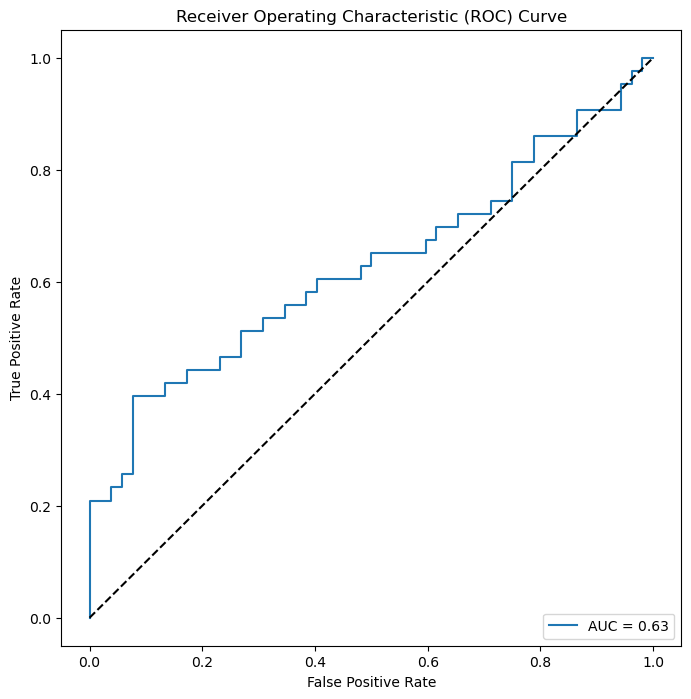

AUC: 0.6275


In [724]:
# LogisticRegressionCV model
logm2 = LogisticRegressionCV(cv=5)  # You can adjust the number of cross-validation folds (cv)
logm2.fit(X_train, y_train)


# Predicting probabilities
y_probs = logm2.predict_proba(X_test)[:, 1]

# Computing ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Computing AUC
auc_value = roc_auc_score(y_test, y_probs)

# Plotting ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc_value:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC: {auc_value:.4f}')


In [725]:
# Adding a constant term to the design matrix (required for statsmodels)
X = sm.add_constant(X_train)

# logistic regression model
model = sm.Probit(y_train, X).fit()

# Calculating AIC
aic_value = model.aic

print(f"AIC: {aic_value:.4f}")

Optimization terminated successfully.
         Current function value: 0.569084
         Iterations 5
AIC: 449.3656


## Model 3
# Including Overall Satsifaction

In [726]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,35,Yes,Travel_Rarely,737,10,3,1,1639,4,Male,55,2,3,1,Married,10306,21530,9,No,17,3,3,80,0,15,3,3,13,12,6,0
1,30,Yes,Travel_Frequently,600,8,3,1,1747,3,Female,66,2,1,4,Divorced,2180,9732,6,No,11,3,3,80,1,6,0,2,4,2,1,2


In [727]:
df3 = pd.concat([df2, df[["JobSatisfaction", "EnvironmentSatisfaction", "RelationshipSatisfaction"]]], axis=1)
df3 = df3.drop(["Education"], axis= 1)
df3

,Attrition,BusinessTravel,DistanceFromHome,OverTime,WorkLifeBalance,Age,Gender,MaritalStatus,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction
0,1,1,10,0,3,35,1,1,1,4,3
1,1,2,8,0,2,30,0,0,4,3,3
2,0,2,18,0,2,35,1,1,1,2,4
3,1,1,24,1,2,53,1,2,1,1,2
4,0,1,2,0,3,32,1,2,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...
469,0,2,1,0,3,26,0,0,3,1,3
470,1,1,3,1,3,30,0,2,1,4,3
471,1,1,2,0,3,58,1,2,3,4,1
472,1,1,7,1,3,23,1,0,4,3,2


In [728]:
X = df3.drop(["Attrition"], axis=1)
y = df3["Attrition"]

## No mapping required

In [729]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [730]:
df3.columns

Index(['Attrition', 'BusinessTravel', 'DistanceFromHome', 'OverTime',
       'WorkLifeBalance', 'Age', 'Gender', 'MaritalStatus', 'JobSatisfaction',
       'EnvironmentSatisfaction', 'RelationshipSatisfaction'],
      dtype='object')

In [731]:

X_train[['BusinessTravel', 'DistanceFromHome', 'OverTime', 'WorkLifeBalance', 'Age', 'Gender', 'MaritalStatus', 'JobSatisfaction','EnvironmentSatisfaction', 'RelationshipSatisfaction']] = scaler.fit_transform(X_train[['BusinessTravel', 'DistanceFromHome', 'OverTime', 'WorkLifeBalance', 'Age', 'Gender', 'MaritalStatus', 'JobSatisfaction','EnvironmentSatisfaction', 'RelationshipSatisfaction']])

X_train.head()

,BusinessTravel,DistanceFromHome,OverTime,WorkLifeBalance,Age,Gender,MaritalStatus,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction
155,-0.258384,-0.133780,1.242427,-0.926767,0.082623,0.878082,-0.313632,0.404627,1.290161,-1.497550
453,1.624836,-0.621303,1.242427,0.403705,-1.854342,0.878082,1.052650,-0.497453,-0.471897,1.200888
22,-0.258384,1.206910,1.242427,-0.926767,0.620670,-1.138846,1.052650,-0.497453,-0.471897,1.200888
310,1.624836,1.572553,-0.804876,-0.926767,-0.563032,0.878082,-1.679915,0.404627,-1.352925,0.301409
46,1.624836,-0.986946,-0.804876,-0.926767,-0.778250,0.878082,1.052650,-1.399532,0.409132,0.301409


In [732]:

clf = LogisticRegression(random_state=42)

# Fitting the model
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[52  0]
 [43  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      1.00      0.71        52
           1       0.00      0.00      0.00        43

    accuracy                           0.55        95
   macro avg       0.27      0.50      0.35        95
weighted avg       0.30      0.55      0.39        95



C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [733]:
# Logistic regression model
import statsmodels.api as sm
logm3 = sm.GLM(y_train,(sm.add_constant(X_train)))
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  379
Model:                            GLM   Df Residuals:                      368
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                         0.19349
Method:                          IRLS   Log-Likelihood:                -220.94
Date:                Fri, 16 Feb 2024   Deviance:                       71.205
Time:                        03:20:15   Pearson chi2:                     71.2
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2744
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.5119      0.023     22.654      0.000       0.468       0.556
BusinessTravel               0.0786      0.023      3.440      0.001       0.034       0.123
DistanceFromHome             0.0293      0.023      1.288      0.198      -0.015       0.074
OverTime                     0.1630      0.023      7.115      0.000       0.118       0.208
WorkLifeBalance             -0.0530      0.023     -2.306      0.021      -0.098      -0.008
Age                         -0.0667      0.023     -2.862      0.004      -0.112      -0.021
Gender                       0.0615      0.023      2.691      0.007       0.017       0.106
MaritalStatus                0.1004      0.023      4.339      0.000       0.055       0.146
JobSatisfaction             -0.0403      0.023     -1.764      0.078      -0.085       0.004
EnvironmentSatisfaction     -0.0485      0.023     -2.123      0.034      -0.093      -0.004
RelationshipSatisfaction    -0.0524      0.023     -2.275      0.023      -0.098      -0.007
============================================================================================
"""

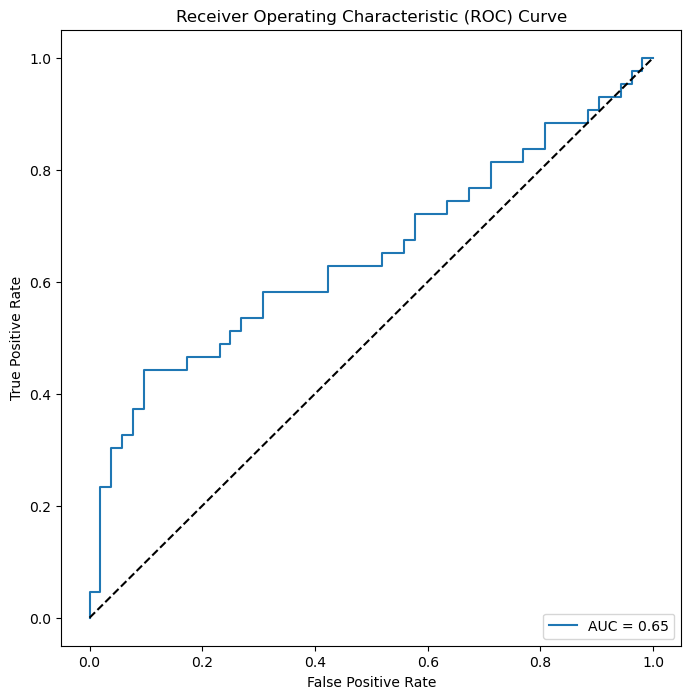

AUC: 0.6471


In [734]:

logm3 = LogisticRegressionCV(cv=5)  
logm3.fit(X_train, y_train)



y_probs = logm3.predict_proba(X_test)[:, 1]

# Computing ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Computing AUC
auc_value = roc_auc_score(y_test, y_probs)

# Plotting ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc_value:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC value
print(f'AUC: {auc_value:.4f}')

In [735]:

X = sm.add_constant(X_train)

#logistic regression model
model = sm.Probit(y_train, X).fit()

# Calculating AIC
aic_value = model.aic

print(f"AIC: {aic_value:.4f}")

Optimization terminated successfully.
         Current function value: 0.553296
         Iterations 5
AIC: 441.3982


# Model 4
## Including Employee Engagement

In [736]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,35,Yes,Travel_Rarely,737,10,3,1,1639,4,Male,55,2,3,1,Married,10306,21530,9,No,17,3,3,80,0,15,3,3,13,12,6,0
1,30,Yes,Travel_Frequently,600,8,3,1,1747,3,Female,66,2,1,4,Divorced,2180,9732,6,No,11,3,3,80,1,6,0,2,4,2,1,2


In [737]:
df4 = pd.concat([df3, df[["TotalWorkingYears", "NumCompaniesWorked","YearsAtCompany","YearsWithCurrManager","YearsInCurrentRole"]]], axis=1)
df4 = df4.drop(["RelationshipSatisfaction"], axis= 1)
df4

,Attrition,BusinessTravel,DistanceFromHome,OverTime,WorkLifeBalance,Age,Gender,MaritalStatus,JobSatisfaction,EnvironmentSatisfaction,TotalWorkingYears,NumCompaniesWorked,YearsAtCompany,YearsWithCurrManager,YearsInCurrentRole
0,1,1,10,0,3,35,1,1,1,4,15,9,13,0,12
1,1,2,8,0,2,30,0,0,4,3,6,6,4,2,2
2,0,2,18,0,2,35,1,1,1,2,9,1,9,8,8
3,1,1,24,1,2,53,1,2,1,1,15,6,2,2,2
4,0,1,2,0,3,32,1,2,1,4,9,4,6,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,0,2,1,0,3,26,0,0,3,1,5,1,5,3,3
470,1,1,3,1,3,30,0,2,1,4,8,5,5,4,2
471,1,1,2,0,3,58,1,2,3,4,7,4,1,0,0
472,1,1,7,1,3,23,1,0,4,3,3,1,3,2,2


In [738]:
X = df4.drop(["Attrition"], axis=1)
y = df4["Attrition"]

## No Mapping Required

In [739]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [740]:
df4.columns

Index(['Attrition', 'BusinessTravel', 'DistanceFromHome', 'OverTime',
       'WorkLifeBalance', 'Age', 'Gender', 'MaritalStatus', 'JobSatisfaction',
       'EnvironmentSatisfaction', 'TotalWorkingYears', 'NumCompaniesWorked',
       'YearsAtCompany', 'YearsWithCurrManager', 'YearsInCurrentRole'],
      dtype='object')

In [741]:

X_train[['BusinessTravel', 'DistanceFromHome', 'OverTime', 'WorkLifeBalance', 'Age', 'Gender', 'MaritalStatus', 'JobSatisfaction','EnvironmentSatisfaction', 'TotalWorkingYears', 'NumCompaniesWorked','YearsAtCompany', 'YearsWithCurrManager', 'YearsInCurrentRole']] = scaler.fit_transform(X_train[['BusinessTravel', 'DistanceFromHome', 'OverTime', 'WorkLifeBalance', 'Age', 'Gender', 'MaritalStatus', 'JobSatisfaction','EnvironmentSatisfaction', 'TotalWorkingYears', 'NumCompaniesWorked','YearsAtCompany', 'YearsWithCurrManager', 'YearsInCurrentRole']])
X_train.head()

,BusinessTravel,DistanceFromHome,OverTime,WorkLifeBalance,Age,Gender,MaritalStatus,JobSatisfaction,EnvironmentSatisfaction,TotalWorkingYears,NumCompaniesWorked,YearsAtCompany,YearsWithCurrManager,YearsInCurrentRole
155,-0.258384,-0.133780,1.242427,-0.926767,0.082623,0.878082,-0.313632,0.404627,1.290161,-1.049405,-1.058682,-0.869994,-1.060451,-1.093523
453,1.624836,-0.621303,1.242427,0.403705,-1.854342,0.878082,1.052650,-0.497453,-0.471897,-1.318592,-0.664536,-1.041015,-1.060451,-1.093523
22,-0.258384,1.206910,1.242427,-0.926767,0.620670,-1.138846,1.052650,-0.497453,-0.471897,-0.780217,-0.664536,-0.356932,-0.482577,-0.161487
310,1.624836,1.572553,-0.804876,-0.926767,-0.563032,0.878082,-1.679915,0.404627,-1.352925,0.027345,-0.664536,0.669192,1.539979,1.081227
46,1.624836,-0.986946,-0.804876,-0.926767,-0.778250,0.878082,1.052650,-1.399532,0.409132,-0.241842,1.700340,-1.041015,-1.060451,-1.093523


In [742]:
clf = LogisticRegression(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[52  0]
 [41  2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.72        52
           1       1.00      0.05      0.09        43

    accuracy                           0.57        95
   macro avg       0.78      0.52      0.40        95
weighted avg       0.76      0.57      0.43        95



In [743]:
# Logistic regression model
import statsmodels.api as sm
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)))
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  379
Model:                            GLM   Df Residuals:                      364
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.17952
Method:                          IRLS   Log-Likelihood:                -204.66
Date:                Fri, 16 Feb 2024   Deviance:                       65.344
Time:                        03:20:15   Pearson chi2:                     65.3
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3509
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5119      0.022     23.520      0.000       0.469       0.555
BusinessTravel              0.0779      0.022      3.530      0.000       0.035       0.121
DistanceFromHome            0.0375      0.022      1.693      0.091      -0.006       0.081
OverTime                    0.1576      0.022      7.117      0.000       0.114       0.201
WorkLifeBalance            -0.0361      0.022     -1.625      0.104      -0.080       0.007
Age                        -0.0411      0.031     -1.337      0.181      -0.101       0.019
Gender                      0.0437      0.022      1.970      0.049       0.000       0.087
MaritalStatus               0.0920      0.022      4.125      0.000       0.048       0.136
JobSatisfaction            -0.0339      0.022     -1.521      0.128      -0.077       0.010
EnvironmentSatisfaction    -0.0494      0.022     -2.233      0.026      -0.093      -0.006
TotalWorkingYears          -0.1133      0.039     -2.905      0.004      -0.190      -0.037
NumCompaniesWorked          0.1037      0.025      4.202      0.000       0.055       0.152
YearsAtCompany              0.1329      0.045      2.952      0.003       0.045       0.221
YearsWithCurrManager       -0.0989      0.041     -2.402      0.016      -0.180      -0.018
YearsInCurrentRole         -0.0433      0.039     -1.119      0.263      -0.119       0.033
===========================================================================================
"""

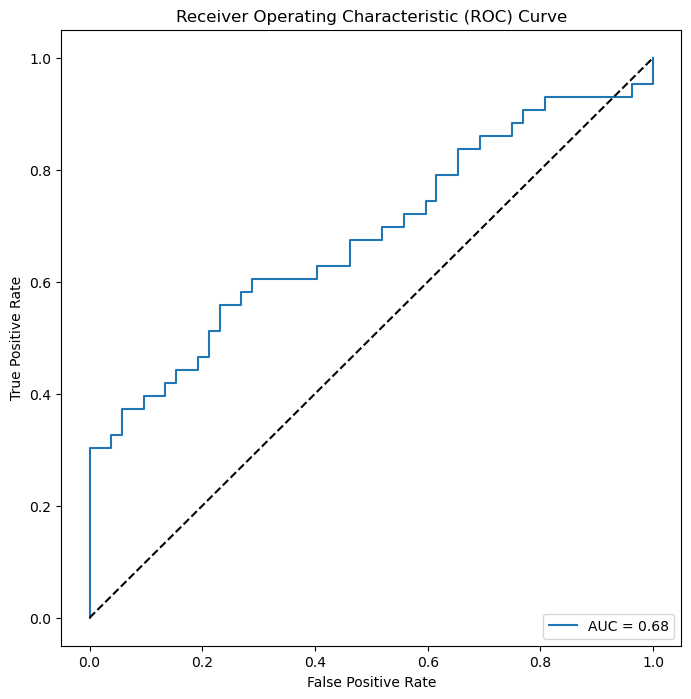

AUC: 0.6816


In [744]:
logm4 = LogisticRegressionCV(cv=5)  # You can adjust the number of cross-validation folds (cv)
logm4.fit(X_train, y_train)

y_probs = logm4.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_value = roc_auc_score(y_test, y_probs)

# Plotting ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc_value:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC value
print(f'AUC: {auc_value:.4f}')

In [745]:
X = sm.add_constant(X_train)

# logistic regression model
model = sm.Probit(y_train, X).fit()

# Calculating AIC
aic_value = model.aic

print(f"AIC: {aic_value:.4f}")

Optimization terminated successfully.
         Current function value: 0.512013
         Iterations 6
AIC: 418.1057


In [746]:
df4.corr(numeric_only=True)

,Attrition,BusinessTravel,DistanceFromHome,OverTime,WorkLifeBalance,Age,Gender,MaritalStatus,JobSatisfaction,EnvironmentSatisfaction,TotalWorkingYears,NumCompaniesWorked,YearsAtCompany,YearsWithCurrManager,YearsInCurrentRole
Attrition,1.000000,0.172249,0.084048,0.293803,-0.082342,-0.181864,0.106868,0.213730,-0.085050,-0.086241,-0.234247,0.093153,-0.191977,-0.248757,-0.222822
BusinessTravel,0.172249,1.000000,0.012902,0.044349,0.008648,-0.056005,-0.092106,0.011963,0.012519,-0.042323,-0.079355,-0.022974,-0.072465,-0.051867,-0.046202
DistanceFromHome,0.084048,0.012902,1.000000,0.051422,-0.055475,0.030702,-0.007661,0.036451,-0.037930,0.015773,0.007161,-0.096496,-0.009068,-0.011397,0.014924
OverTime,0.293803,0.044349,0.051422,1.000000,0.006919,0.031401,0.009530,0.034068,0.066684,0.057224,-0.002400,-0.001471,-0.033154,-0.041218,-0.014928
WorkLifeBalance,-0.082342,0.008648,-0.055475,0.006919,1.000000,0.006121,-0.056597,0.035214,-0.056171,-0.007612,0.042227,0.004876,0.036868,0.034864,0.082539
Age,-0.181864,-0.056005,0.030702,0.031401,0.006121,1.000000,-0.027034,-0.148284,-0.002058,0.033218,0.687018,0.311682,0.382980,0.279719,0.275525
Gender,0.106868,-0.092106,-0.007661,0.009530,-0.056597,-0.027034,1.000000,-0.035212,0.011852,0.007789,-0.083411,0.044722,-0.068912,-0.104205,-0.091124
MaritalStatus,0.213730,0.011963,0.036451,0.034068,0.035214,-0.148284,-0.035212,1.000000,-0.018964,0.016758,-0.102019,-0.083341,-0.048200,-0.056943,-0.049186
JobSatisfaction,-0.085050,0.012519,-0.037930,0.066684,-0.056171,-0.002058,0.011852,-0.018964,1.000000,0.012495,-0.012237,-0.113241,0.071317,0.036630,0.073107
EnvironmentSatisfaction,-0.086241,-0.042323,0.015773,0.057224,-0.007612,0.033218,0.007789,0.016758,0.012495,1.000000,-0.003340,-0.010507,0.032510,0.039293,0.073698


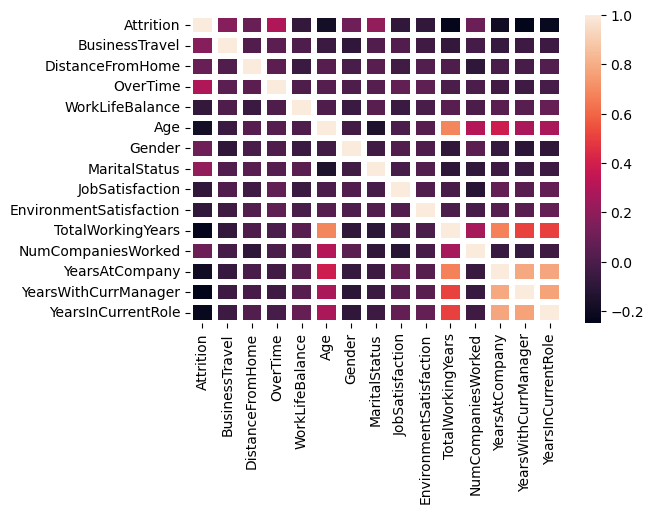

In [747]:
# heatmap
plt.figure(figsize=(6, 4))  
sns.heatmap(df4.corr(), linewidths=4 )
# Saving the heatmap to an image file
plt.savefig('final_heatmap.png')

In [748]:
from sklearn.metrics import confusion_matrix

y_pred = logm4.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# True Positives, False Positives, False Negatives
tp = conf_matrix[1, 1]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]

# Sensitivity (Recall)
sensitivity = tp / (tp + fn)

# Precision
precision = tp / (tp + fp)

print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Precision: {precision:.4f}")


Sensitivity (Recall): 0.0233
Precision: 1.0000


# Model 5 
## Dropping Insignificant Variables

In [749]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,35,Yes,Travel_Rarely,737,10,3,1,1639,4,Male,55,2,3,1,Married,10306,21530,9,No,17,3,3,80,0,15,3,3,13,12,6,0
1,30,Yes,Travel_Frequently,600,8,3,1,1747,3,Female,66,2,1,4,Divorced,2180,9732,6,No,11,3,3,80,1,6,0,2,4,2,1,2


In [750]:

df5=df4.drop(["WorkLifeBalance", "Age", "JobSatisfaction", "YearsInCurrentRole"], axis =1)
df5

,Attrition,BusinessTravel,DistanceFromHome,OverTime,Gender,MaritalStatus,EnvironmentSatisfaction,TotalWorkingYears,NumCompaniesWorked,YearsAtCompany,YearsWithCurrManager
0,1,1,10,0,1,1,4,15,9,13,0
1,1,2,8,0,0,0,3,6,6,4,2
2,0,2,18,0,1,1,2,9,1,9,8
3,1,1,24,1,1,2,1,15,6,2,2
4,0,1,2,0,1,2,4,9,4,6,4
...,...,...,...,...,...,...,...,...,...,...,...
469,0,2,1,0,0,0,1,5,1,5,3
470,1,1,3,1,0,2,4,8,5,5,4
471,1,1,2,0,1,2,4,7,4,1,0
472,1,1,7,1,1,0,3,3,1,3,2


In [751]:
X = df5.drop(["Attrition"], axis=1)
y = df5["Attrition"]

In [752]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [753]:
df5.columns

Index(['Attrition', 'BusinessTravel', 'DistanceFromHome', 'OverTime', 'Gender',
       'MaritalStatus', 'EnvironmentSatisfaction', 'TotalWorkingYears',
       'NumCompaniesWorked', 'YearsAtCompany', 'YearsWithCurrManager'],
      dtype='object')

In [754]:

X_train[['BusinessTravel', 'DistanceFromHome', 'OverTime', 'Gender', 'MaritalStatus','EnvironmentSatisfaction', 'TotalWorkingYears', 'NumCompaniesWorked','YearsAtCompany', 'YearsWithCurrManager']] = scaler.fit_transform(X_train[['BusinessTravel', 'DistanceFromHome', 'OverTime', 'Gender', 'MaritalStatus','EnvironmentSatisfaction', 'TotalWorkingYears', 'NumCompaniesWorked','YearsAtCompany', 'YearsWithCurrManager']])
X_train.head()

,BusinessTravel,DistanceFromHome,OverTime,Gender,MaritalStatus,EnvironmentSatisfaction,TotalWorkingYears,NumCompaniesWorked,YearsAtCompany,YearsWithCurrManager
155,-0.258384,-0.133780,1.242427,0.878082,-0.313632,1.290161,-1.049405,-1.058682,-0.869994,-1.060451
453,1.624836,-0.621303,1.242427,0.878082,1.052650,-0.471897,-1.318592,-0.664536,-1.041015,-1.060451
22,-0.258384,1.206910,1.242427,-1.138846,1.052650,-0.471897,-0.780217,-0.664536,-0.356932,-0.482577
310,1.624836,1.572553,-0.804876,0.878082,-1.679915,-1.352925,0.027345,-0.664536,0.669192,1.539979
46,1.624836,-0.986946,-0.804876,0.878082,1.052650,0.409132,-0.241842,1.700340,-1.041015,-1.060451


In [755]:

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)

# Evaluating the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[41 11]
 [22 21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.79      0.71        52
           1       0.66      0.49      0.56        43

    accuracy                           0.65        95
   macro avg       0.65      0.64      0.64        95
weighted avg       0.65      0.65      0.64        95



In [756]:
# Logistic regression model
import statsmodels.api as sm
logm5 = sm.GLM(y_train,(sm.add_constant(X_train)))
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  379
Model:                            GLM   Df Residuals:                      368
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                         0.18163
Method:                          IRLS   Log-Likelihood:                -208.95
Date:                Fri, 16 Feb 2024   Deviance:                       66.841
Time:                        03:20:17   Pearson chi2:                     66.8
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3331
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5119      0.022     23.382      0.000       0.469       0.555
BusinessTravel              0.0747      0.022      3.369      0.001       0.031       0.118
DistanceFromHome            0.0375      0.022      1.694      0.090      -0.006       0.081
OverTime                    0.1527      0.022      6.898      0.000       0.109       0.196
Gender                      0.0465      0.022      2.096      0.036       0.003       0.090
MaritalStatus               0.0942      0.022      4.230      0.000       0.051       0.138
EnvironmentSatisfaction    -0.0540      0.022     -2.441      0.015      -0.097      -0.011
TotalWorkingYears          -0.1378      0.033     -4.221      0.000      -0.202      -0.074
NumCompaniesWorked          0.1015      0.024      4.155      0.000       0.054       0.149
YearsAtCompany              0.1153      0.043      2.707      0.007       0.032       0.199
YearsWithCurrManager       -0.1215      0.036     -3.369      0.001      -0.192      -0.051
===========================================================================================
"""

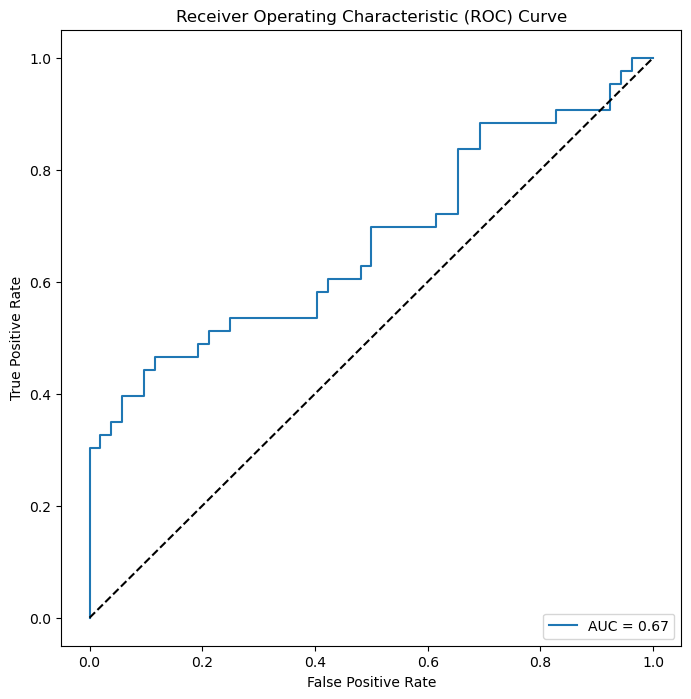

AUC: 0.6699


In [757]:
logm4 = LogisticRegressionCV(cv=5)  
logm4.fit(X_train, y_train)

y_probs = logm4.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_value = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc_value:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC value
print(f'AUC: {auc_value:.4f}')

In [758]:
X = sm.add_constant(X_train)
model = sm.Probit(y_train, X).fit()
aic_value = model.aic

print(f"AIC: {aic_value:.4f}")

Optimization terminated successfully.
         Current function value: 0.519656
         Iterations 6
AIC: 415.8994


## Model 6
## Dropping Distance from home variable


In [759]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,35,Yes,Travel_Rarely,737,10,3,1,1639,4,Male,55,2,3,1,Married,10306,21530,9,No,17,3,3,80,0,15,3,3,13,12,6,0
1,30,Yes,Travel_Frequently,600,8,3,1,1747,3,Female,66,2,1,4,Divorced,2180,9732,6,No,11,3,3,80,1,6,0,2,4,2,1,2


In [760]:

df6=df5.drop(["DistanceFromHome"], axis =1)
df6

,Attrition,BusinessTravel,OverTime,Gender,MaritalStatus,EnvironmentSatisfaction,TotalWorkingYears,NumCompaniesWorked,YearsAtCompany,YearsWithCurrManager
0,1,1,0,1,1,4,15,9,13,0
1,1,2,0,0,0,3,6,6,4,2
2,0,2,0,1,1,2,9,1,9,8
3,1,1,1,1,2,1,15,6,2,2
4,0,1,0,1,2,4,9,4,6,4
...,...,...,...,...,...,...,...,...,...,...
469,0,2,0,0,0,1,5,1,5,3
470,1,1,1,0,2,4,8,5,5,4
471,1,1,0,1,2,4,7,4,1,0
472,1,1,1,1,0,3,3,1,3,2


In [761]:
df6.shape

(474, 10)

In [762]:
X = df6.drop(["Attrition"], axis=1)
y = df6["Attrition"]

In [763]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [764]:
df6.columns

Index(['Attrition', 'BusinessTravel', 'OverTime', 'Gender', 'MaritalStatus',
       'EnvironmentSatisfaction', 'TotalWorkingYears', 'NumCompaniesWorked',
       'YearsAtCompany', 'YearsWithCurrManager'],
      dtype='object')

In [765]:

X_train[['BusinessTravel', 'OverTime', 'Gender', 'MaritalStatus','EnvironmentSatisfaction', 'TotalWorkingYears', 'NumCompaniesWorked','YearsAtCompany', 'YearsWithCurrManager']] = scaler.fit_transform(X_train[['BusinessTravel', 'OverTime', 'Gender', 'MaritalStatus','EnvironmentSatisfaction', 'TotalWorkingYears', 'NumCompaniesWorked','YearsAtCompany', 'YearsWithCurrManager']])
X_train.head()

,BusinessTravel,OverTime,Gender,MaritalStatus,EnvironmentSatisfaction,TotalWorkingYears,NumCompaniesWorked,YearsAtCompany,YearsWithCurrManager
155,-0.258384,1.242427,0.878082,-0.313632,1.290161,-1.049405,-1.058682,-0.869994,-1.060451
453,1.624836,1.242427,0.878082,1.052650,-0.471897,-1.318592,-0.664536,-1.041015,-1.060451
22,-0.258384,1.242427,-1.138846,1.052650,-0.471897,-0.780217,-0.664536,-0.356932,-0.482577
310,1.624836,-0.804876,0.878082,-1.679915,-1.352925,0.027345,-0.664536,0.669192,1.539979
46,1.624836,-0.804876,0.878082,1.052650,0.409132,-0.241842,1.700340,-1.041015,-1.060451


Confusion Matrix:
 [[46  6]
 [26 17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.88      0.74        52
           1       0.74      0.40      0.52        43

    accuracy                           0.66        95
   macro avg       0.69      0.64      0.63        95
weighted avg       0.68      0.66      0.64        95



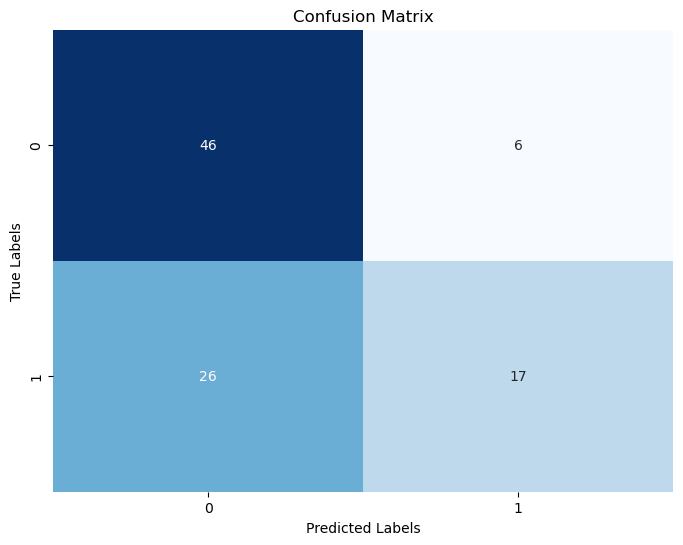

In [766]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm= confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 10})
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [767]:
# Logistic regression model
import statsmodels.api as sm
logm5 = sm.GLM(y_train,(sm.add_constant(X_train)))
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  379
Model:                            GLM   Df Residuals:                      369
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                         0.18255
Method:                          IRLS   Log-Likelihood:                -210.43
Date:                Fri, 16 Feb 2024   Deviance:                       67.363
Time:                        03:20:18   Pearson chi2:                     67.4
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3266
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5119      0.022     23.323      0.000       0.469       0.555
BusinessTravel              0.0761      0.022      3.425      0.001       0.033       0.120
OverTime                    0.1544      0.022      6.963      0.000       0.111       0.198
Gender                      0.0465      0.022      2.093      0.036       0.003       0.090
MaritalStatus               0.0959      0.022      4.302      0.000       0.052       0.140
EnvironmentSatisfaction    -0.0542      0.022     -2.444      0.015      -0.098      -0.011
TotalWorkingYears          -0.1358      0.033     -4.154      0.000      -0.200      -0.072
NumCompaniesWorked          0.0968      0.024      3.979      0.000       0.049       0.145
YearsAtCompany              0.1162      0.043      2.722      0.006       0.033       0.200
YearsWithCurrManager       -0.1230      0.036     -3.403      0.001      -0.194      -0.052
===========================================================================================
"""

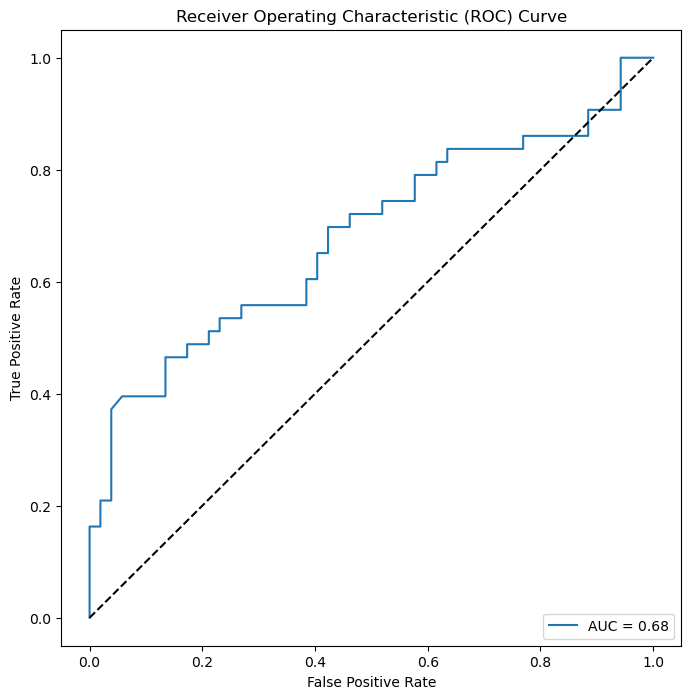

AUC: 0.6800


In [768]:
logm4 = LogisticRegressionCV(cv=5)  # You can adjust the number of cross-validation folds (cv)
logm4.fit(X_train, y_train)

y_probs = logm4.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_value = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc_value:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC value
print(f'AUC: {auc_value:.4f}')

In [769]:
X = sm.add_constant(X_train)

# logistic regression model
model = sm.Probit(y_train, X).fit()

# Calculating AIC
aic_value = model.aic

print(f"AIC: {aic_value:.4f}")

Optimization terminated successfully.
         Current function value: 0.524266
         Iterations 6
AIC: 417.3938


In [770]:
y_pred = logm4.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# True Positives, False Positives, False Negatives
tp = conf_matrix[1, 1]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]

# Sensitivity (Recall)
sensitivity = tp / (tp + fn)

# Precision
precision = tp / (tp + fp)

print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Precision: {precision:.4f}")

Sensitivity (Recall): 0.3953
Precision: 0.7391


In [771]:
# Checking the VIF values for our Variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                  Variable       VIF
0                    const  1.000000
1           BusinessTravel  1.023510
2                 OverTime  1.021068
3                   Gender  1.026315
4            MaritalStatus  1.032006
5  EnvironmentSatisfaction  1.019870
6        TotalWorkingYears  2.219991
7       NumCompaniesWorked  1.229104
8           YearsAtCompany  3.783904
9     YearsWithCurrManager  2.710849


In [772]:
beta= 0.5119
beta0 = 0.0761
beta1 =0.1544
beta2=-0.0645
beta3=0.0955
beta4=-0.0542
beta5=-0.1358
beta6=0.0968
beta7=0.1162
beta8=-0.1230


# Displaying the logistic regression equation
equation = "P(Attrition=1) = 1 / (1 + e^(-({} + {} * BusinessTravel + {} * OverTime + {} * Age + {} * MaritalStatus + {} * EnvironmentSatisfaction + {} * TotalWorkingYEar + {} * NumCompWork + {} * YearsAtcomp + {} * YearsCurrManager  )))".format(
    beta,beta0, beta1, beta2,beta3,beta4,beta5,beta6,beta7,beta8)  # Replace ... with other beta coefficients

print("Logistic Regression Equation:")
print(equation)

Logistic Regression Equation:
P(Attrition=1) = 1 / (1 + e^(-(0.5119 + 0.0761 * BusinessTravel + 0.1544 * OverTime + -0.0645 * Age + 0.0955 * MaritalStatus + -0.0542 * EnvironmentSatisfaction + -0.1358 * TotalWorkingYEar + 0.0968 * NumCompWork + 0.1162 * YearsAtcomp + -0.123 * YearsCurrManager  )))


<Axes: >

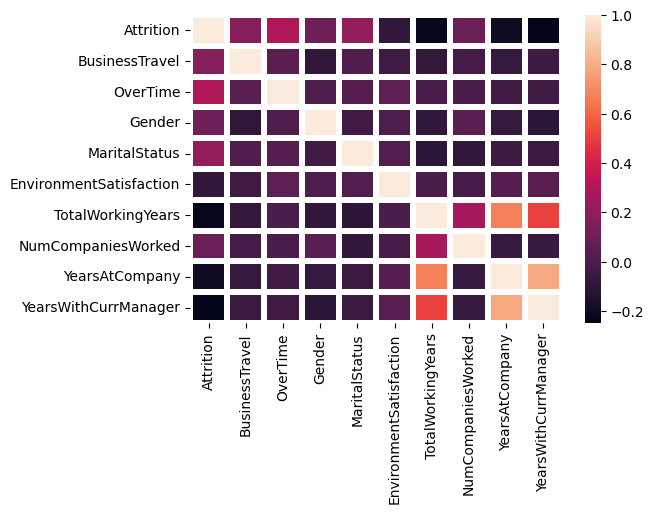

In [773]:
# Final heatmap
plt.figure(figsize=(6, 4))  
sns.heatmap(df6.corr(), linewidths=4 )


In [774]:
df_new         # the dataset that we originally copied from "df" dataframe

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,35,Yes,Travel_Rarely,737,10,3,1,1639,4,Male,55,2,3,1,Married,10306,21530,9,No,17,3,3,80,0,15,3,3,13,12,6,0
1,30,Yes,Travel_Frequently,600,8,3,1,1747,3,Female,66,2,1,4,Divorced,2180,9732,6,No,11,3,3,80,1,6,0,2,4,2,1,2
2,35,No,Travel_Frequently,853,18,5,1,74,2,Male,71,3,3,1,Married,9069,11031,1,No,22,4,4,80,1,9,3,2,9,8,1,8
3,53,Yes,Travel_Rarely,1168,24,4,1,1968,1,Male,66,3,3,1,Single,10448,5843,6,Yes,13,3,2,80,0,15,2,2,2,2,2,2
4,32,No,Travel_Rarely,128,2,1,1,362,4,Male,84,2,2,1,Single,2176,19737,4,No,13,3,4,80,0,9,5,3,6,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,26,No,Travel_Frequently,921,1,1,1,1068,1,Female,66,2,1,3,Divorced,2007,25265,1,No,13,3,3,80,2,5,5,3,5,3,1,3
470,30,Yes,Travel_Rarely,1005,3,3,1,297,4,Female,88,3,1,1,Single,2657,8556,5,Yes,11,3,3,80,0,8,5,3,5,2,0,4
471,58,Yes,Travel_Rarely,289,2,3,1,977,4,Male,51,3,1,3,Single,2479,26227,4,No,24,4,1,80,0,7,4,3,1,0,0,0
472,23,Yes,Travel_Rarely,427,7,3,1,1702,3,Male,99,3,1,4,Divorced,2275,25103,1,Yes,21,4,2,80,1,3,2,3,3,2,0,2


In [775]:
df_new.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
DistanceFromHome            0
Education                   0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [776]:
df_new["BusinessTravel"].value_counts()

Travel_Rarely        326
Travel_Frequently    109
Non-Travel            39
Name: BusinessTravel, dtype: int64

In [777]:
# Mapping
# Creating a mapping dictionary
mapping0 = {'Travel_Frequently':-1, 'Travel_Rarely': 0, 'Non-Travel':1}

mapping1 = {'Male': 1, 'Female': 0}
mapping2= {'Single':2, 'Married':1, 'Divorced':0 }
mapping3 = {"Yes": 0, "No": 1}
mapping4 = {"Yes": 1, "No": 0}

df_new["BusinessTravel"] = df_new["BusinessTravel"].map(mapping0)
df_new["Gender"] = df_new["Gender"].map(mapping1)
df_new["MaritalStatus"] = df_new["MaritalStatus"].map(mapping2)
df_new["OverTime"] = df_new["OverTime"].map(mapping3)
df_new["Attrition"] = df_new["Attrition"].map(mapping4)

In [778]:
# train-test split
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(df_new.drop(["Attrition"], axis= 1), df_new["Attrition"])

In [779]:
# Random forest Classifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, criterion = "gini", random_state= 42)
clf.fit((X_new_train), y_new_train)
y_hat = clf.predict(X_new_test)



Confusion Matrix:
 [[49  6]
 [23 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.89      0.77        55
           1       0.87      0.64      0.74        64

    accuracy                           0.76       119
   macro avg       0.78      0.77      0.76       119
weighted avg       0.78      0.76      0.75       119



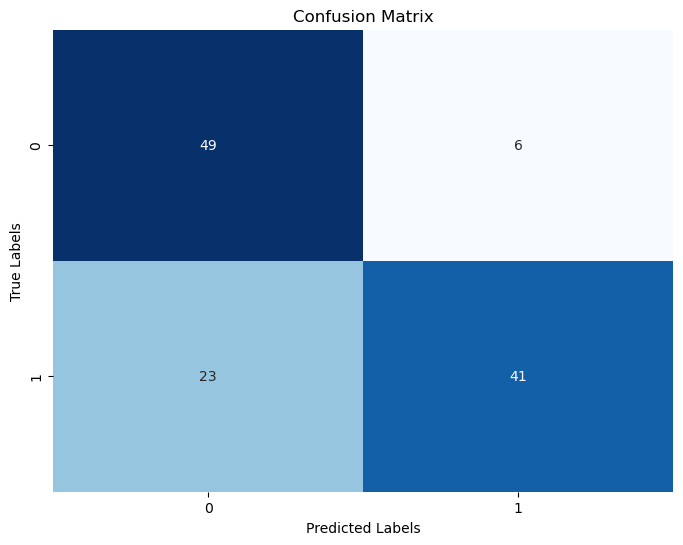

In [780]:
cm= confusion_matrix(y_new_test, y_hat)

# Evaluating the model
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_new_test, y_hat))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 10})
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

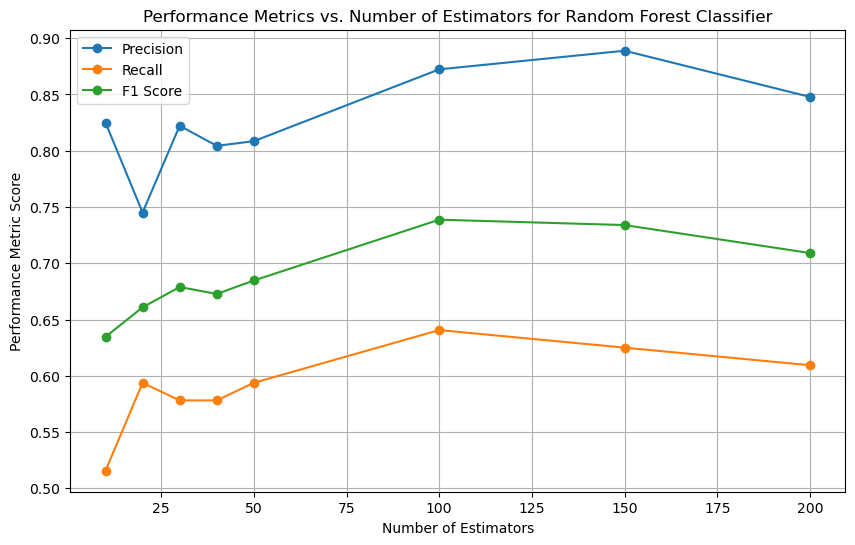

In [781]:
from sklearn.metrics import precision_score, recall_score, f1_score

# lists to store performance metrics
precision_scores = []
recall_scores = []
f1_scores = []

n_estimators_values = [10,20, 30, 40, 50, 100, 150, 200]

for n_estimators in n_estimators_values:
    
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state= 42)
    clf.fit(X_new_train, y_new_train)  
    
    y_hat = clf.predict(X_new_test)  
    
    # Calculating precision, recall, and F1 score
    precision = precision_score(y_new_test, y_hat)
    recall = recall_score(y_new_test, y_hat)
    f1 = f1_score(y_new_test, y_hat)
    
    # Appending scores to lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plotting performance metrics against the number of estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, precision_scores, label='Precision', marker='o')
plt.plot(n_estimators_values, recall_scores, label='Recall', marker='o')
plt.plot(n_estimators_values, f1_scores, label='F1 Score', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Performance Metric Score')
plt.title('Performance Metrics vs. Number of Estimators for Random Forest Classifier')
plt.legend()
plt.grid(True)
plt.show()

In [782]:
# XGBoost Classifier

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Intializing
xgb_classifier = xgb.XGBClassifier()

# Defining the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees in the forest
    'max_depth': [3, 5, 7],               # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.3],    # Learning rate
    'subsample': [0.7, 0.8, 0.9],         # Subsample ratio of the training instances
    'colsample_bytree': [0.7, 0.8, 0.9]   # Subsample ratio of columns when constructing each tree
}

# GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fitting the grid search to the data
grid_search.fit(X_new_train, y_new_train)

# best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Final model
best_model = grid_search.best_estimator_

# Evaluating the model on the test set
y_pred = best_model.predict(X_new_test)


print("Confusion Matrix:\n", confusion_matrix(y_new_test, y_pred))
print("\nClassification Report:\n", classification_report(y_new_test, y_pred))


Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END 

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200,

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200,

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200,

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200,

[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200,

[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.2s
Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth

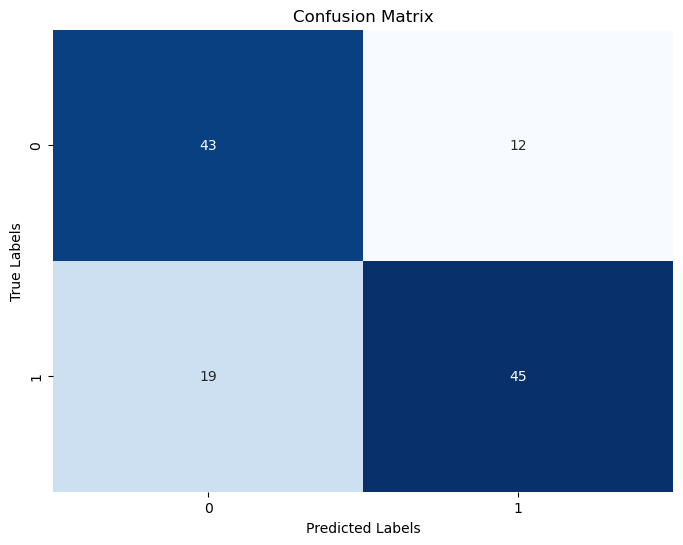

In [783]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_new_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 10})
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### The obtained precision recall and f1 score using all the 3 methods

|    Model Name      |  Precision      |  Recall         |     F1 score   |
|--------------------|-----------------|-----------------|----------------|
| Logistic Regression|      0.74       |      0.40       |     0.52       |
| Random Forest      |      0.87       |      0.64       |     0.74       |
| XGBoost            |      0.79       |      0.70       |     0.74       |

#### Conclusion
* Logistic Regression has a very low value of recall and F1 score suggesting that it is not a good model for this case. This can be due to the presence of non-linear relationship between our dependent and independent variables

* The difference in recall between Random Forest classifier and XGBoost is not significant enough to justify the computational cost of running XGBoost.

#### Hence Random Forest would be the most preferred model in this case

